In [26]:
!which python
import sys
sys.version



/Users/jagpreetsingh/Documents/CBD_3335_Data-mining/data_mining/assignment2/HousePrice-Prediction/venv/bin/python


'3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('House_Price_dataset.csv')

In [5]:
def set_labels(title=None, xlabel=None ,ylabel=None):
    plt.figure(figsize=(8,7))
    plt.title(title,fontdict={'fontsize':15,'fontweight':'bold'})
    plt.xlabel(xlabel,fontdict={'fontsize':13})
    plt.ylabel(ylabel,fontdict={'fontsize':13})
    plt.tight_layout()


In [6]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [7]:
df.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla
168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3,9.4 Marla,For Sale,3,07-18-2019,ZPN Real Estate & Builders,Ali Raza,Marla,9.4,5-10 Marla


In [8]:
df.shape

(168446, 20)

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area type', 'area size', 'area category'],
      dtype='object')

In [10]:
## get the area in sq-ft

## 1 marla == 272.25 sq-ft
## 1 kanal == 5445 sq-ft
df['area size'] = df['area size'] * (df['area type'].map({'Marla': 272.25, 'Kanal': 5445}))

## drop columns "area" "Area Type"
df.drop(['area','area type'],axis=1,inplace=True)

print(f"shape after drop:{df.shape}")

shape after drop:(168446, 18)


## Statistical Analysis

In [23]:
df.describe(percentiles=[.05,.15,.25,.35,.5,.65,.75,.85]).T

,count,mean,std,min,5%,15%,25%,35%,50%,65%,75%,85%,max
price,168446.0,1.776576e+07,3.531003e+07,0.000000,25000.000000,50000.000000,175000.000000,4.200000e+06,8.500000e+06,1.400000e+07,1.950000e+07,3.100000e+07,2.000000e+09
latitude,168446.0,2.985952e+01,3.807870e+00,11.052446,24.813927,24.907822,24.948536,2.505861e+01,3.145978e+01,3.159882e+01,3.356089e+01,3.364642e+01,7.318409e+01
longitude,168446.0,7.123980e+01,3.133042e+00,25.906027,67.042007,67.066298,67.130363,6.732117e+01,7.305618e+01,7.312682e+01,7.325987e+01,7.428282e+01,8.016143e+01
baths,168446.0,2.874227e+00,2.463400e+00,0.000000,0.000000,0.000000,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,4.030000e+02
bedrooms,168446.0,3.179422e+00,1.971401e+00,0.000000,0.000000,1.000000,2.000000,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,6.800000e+01
area size,168446.0,3.252030e+03,2.460602e+04,0.000000,735.075000,1089.000000,1306.800000,1.361250e+03,1.932975e+03,2.722500e+03,3.267000e+03,5.445000e+03,4.356000e+06


In [11]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,area size,area category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,1089.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,1524.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,2178.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,10890.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.0,5-10 Marla


In [12]:
## drop "page_url", "property_id" as these are only used as identification and do not conribute to our analysis
## drop "location"  and "location_id" as we have latitude and longitude

df.drop(['page_url','property_id','location_id','location'],axis=1,inplace=True)

print(f"shape after drop:{df.shape}")

shape after drop:(168446, 14)


In [13]:
df.head()

,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,area size,area category
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,1089.0,0-5 Marla
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,1524.6,5-10 Marla
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,2178.0,5-10 Marla
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,10890.0,1-5 Kanal
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.0,5-10 Marla


In [14]:
## types of each columns

df.dtypes

property_type     object
price              int64
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
area size        float64
area category     object
dtype: object

Missing Values:
property_type    0.000000
price            0.000000
city             0.000000
province_name    0.000000
latitude         0.000000
longitude        0.000000
baths            0.000000
purpose          0.000000
bedrooms         0.000000
date_added       0.000000
agency           0.261633
agent            0.261639
area size        0.000000
area category    0.000000
dtype: float64


<Axes: >

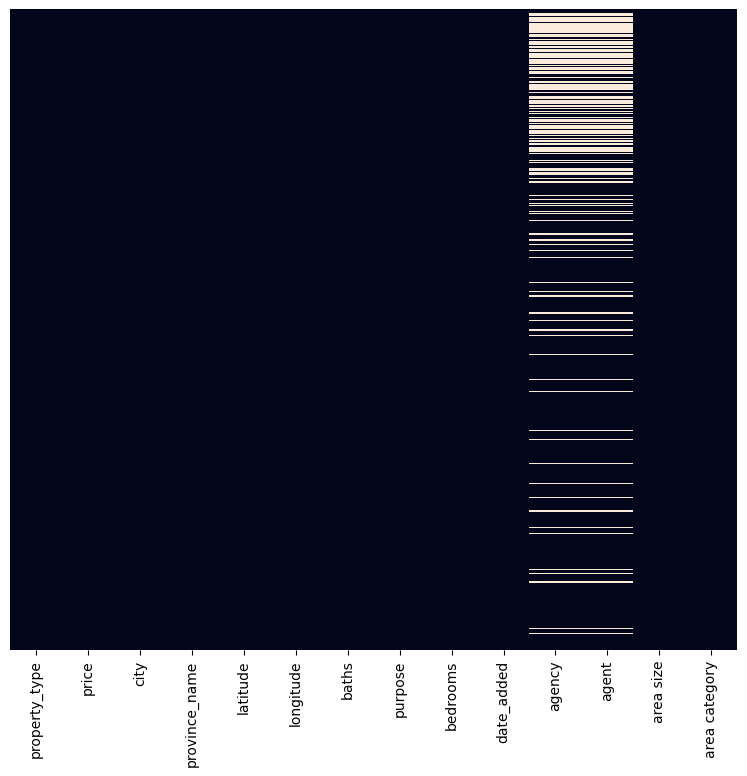

In [18]:
## missing values
print(f"Missing Values:\n{df.isnull().mean()}")
set_labels()
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [ ]:
## distinguish the columns as categoirical and numerical

categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print(f"Categorical Columns:\n{categorical_columns}\n")
print(f"No. of categorical columns:{len(categorical_columns)}\n\n")
print(f"Numerical columns:\n{numerical_columns}\n")
print(f"No. of numerical columns:{len(numerical_columns)}")

Categorical Columns:
['property_type', 'city', 'province_name', 'purpose', 'date_added', 'agency', 'agent', 'area category']

No. of categorical columns:8


Numerical columns:
['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area size']

No. of numerical columns:6


## EDA

### Categorical Columns

In [ ]:
for col in categorical_columns:
    print(f"No of Unique values for {col.capitalize()}: {df[col].nunique()}\n")

No of Unique values for Property_type: 7

No of Unique values for City: 5

No of Unique values for Province_name: 3

No of Unique values for Purpose: 2

No of Unique values for Date_added: 124

No of Unique values for Agency: 5761

No of Unique values for Agent: 10598

No of Unique values for Area category: 22



In [ ]:
## 
def cardinality(categorical_columns,threshold=20):
    low_cardinality_columns = []
    for col in categorical_columns:
        if df[col].nunique() < threshold:
            low_cardinality_columns.append(col)
    return low_cardinality_columns

## calling cardinality function
threshold = 23
low_card_columns = cardinality(categorical_columns,threshold)

print(f"columns with cardinality less than {threshold}:{low_card_columns}")



columns with cardinality less than 23:['property_type', 'city', 'province_name', 'purpose', 'area category']


- for columns agency and agent where agency represent what agency sold the house and agent is the name of the agent we can transform this feature to column which show is the house is sold by agency or not

In [ ]:
df['agency'] = df['agency'].fillna(0)
df['agency'] = df['agency'].apply(lambda x: 1 if x !=0 else 0)

print(f"percentage of distribution of agency :\n{df['agency'].value_counts()/df.shape[0]}")

percentage of distribution of agency :
agency
1    0.738367
0    0.261633
Name: count, dtype: float64


In [ ]:
## droping the "date added" column as does not contribute to our analysis and also agent column as no longer needed
df.drop(['date_added','agent'],axis=1,inplace=True)
print(f"shape after drop:{df.shape}") 

shape after drop:(168446, 12)


Percentage of each categories in Property_type:
property_type
House            0.626124
Flat             0.227004
Upper Portion    0.081771
Lower Portion    0.054789
Room             0.004067
Farm House       0.003900
Penthouse        0.002345
Name: count, dtype: float64


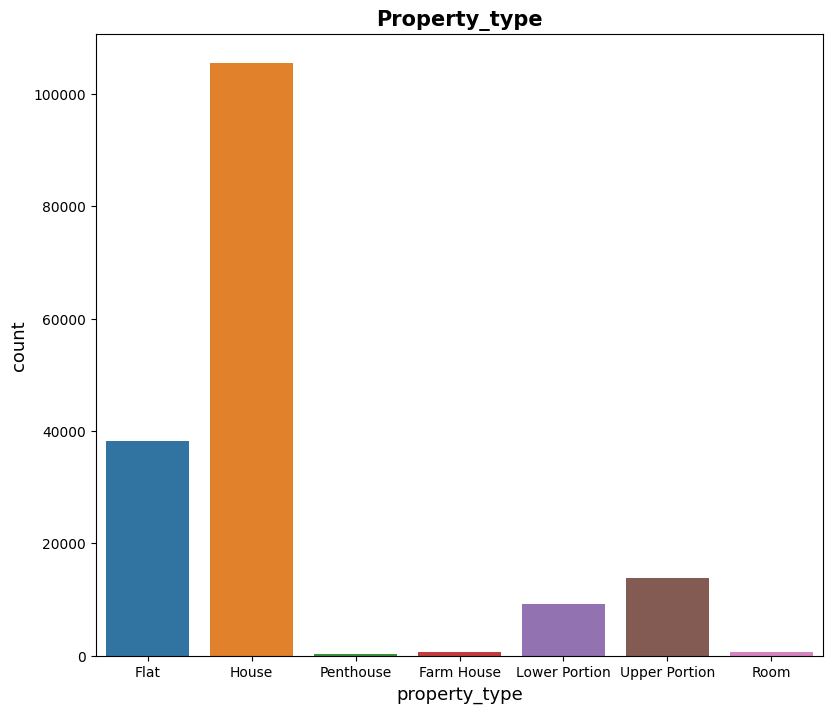

Percentage of each categories in City:
city
Karachi       0.359071
Lahore        0.245936
Islamabad     0.222184
Rawalpindi    0.124527
Faisalabad    0.048283
Name: count, dtype: float64


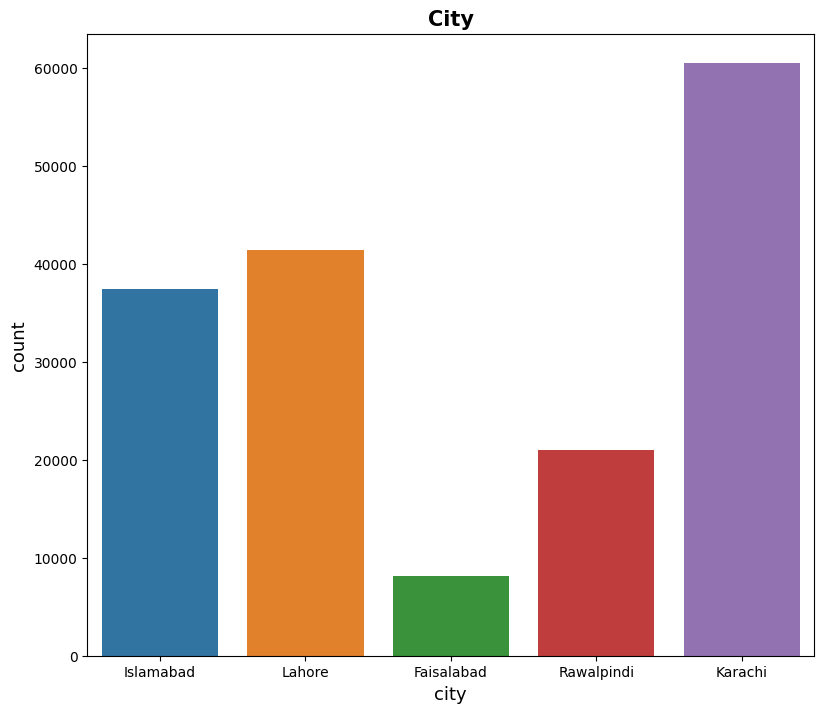

Percentage of each categories in Province_name:
province_name
Punjab               0.418745
Sindh                0.359071
Islamabad Capital    0.222184
Name: count, dtype: float64


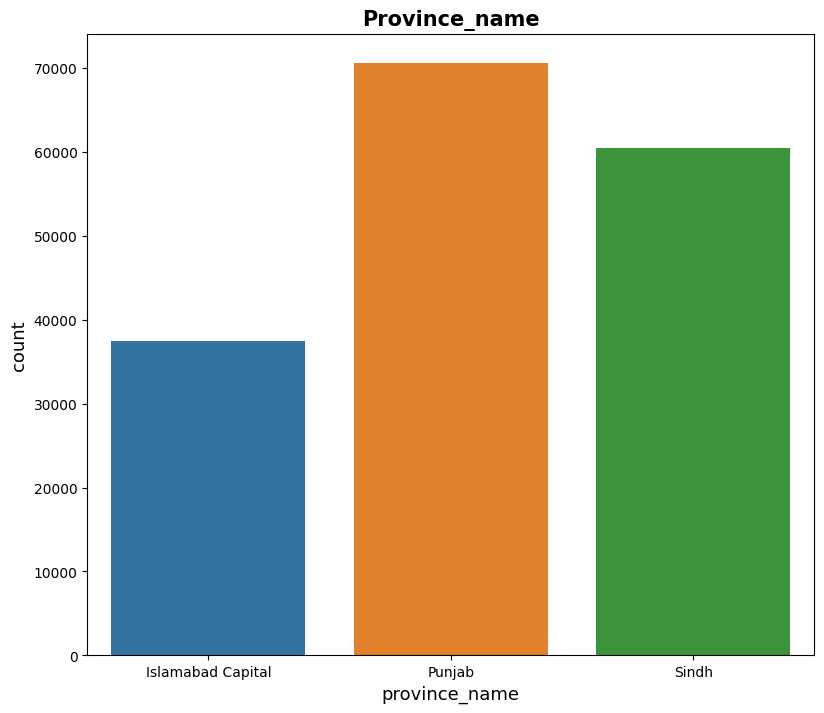

Percentage of each categories in Purpose:
purpose
For Sale    0.716283
For Rent    0.283717
Name: count, dtype: float64


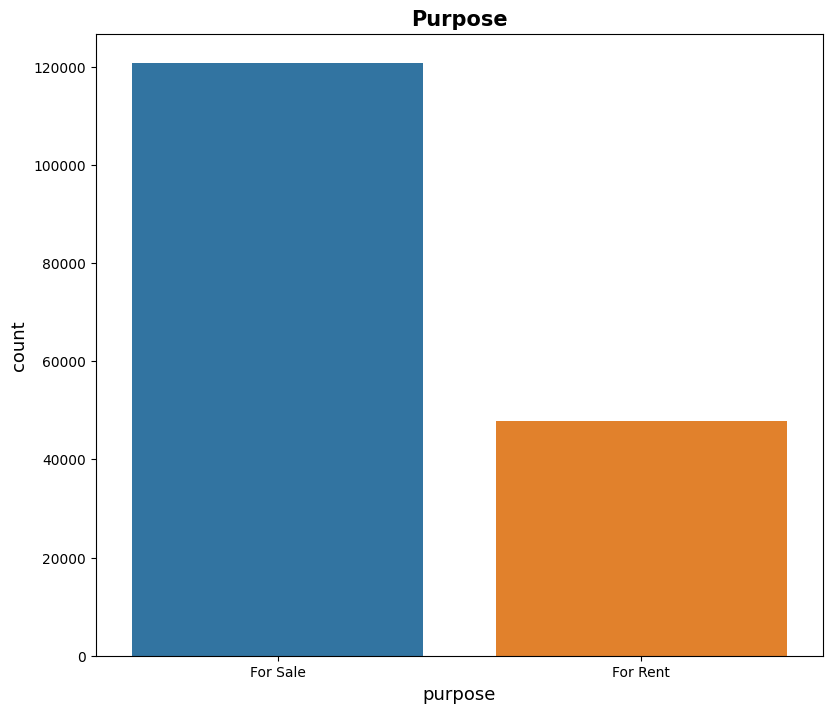

Percentage of each categories in Area category:
area category
0-5 Marla        0.382918
5-10 Marla       0.333881
1-5 Kanal        0.178680
10-15 Marla      0.082163
15-20 Marla      0.018920
5-10 Kanal       0.001971
15-20 Kanal      0.000540
20-30 Kanal      0.000261
10-15 Kanal      0.000261
30-40 Kanal      0.000137
40-50 Kanal      0.000065
60-70 Kanal      0.000047
400-500 Kanal    0.000036
80-90 Kanal      0.000030
100-200 Kanal    0.000024
200-300 Kanal    0.000018
70-80 Kanal      0.000012
90-100 Kanal     0.000012
50-60 Kanal      0.000006
500-600 Kanal    0.000006
600-700 Kanal    0.000006
700-800 Kanal    0.000006
Name: count, dtype: float64


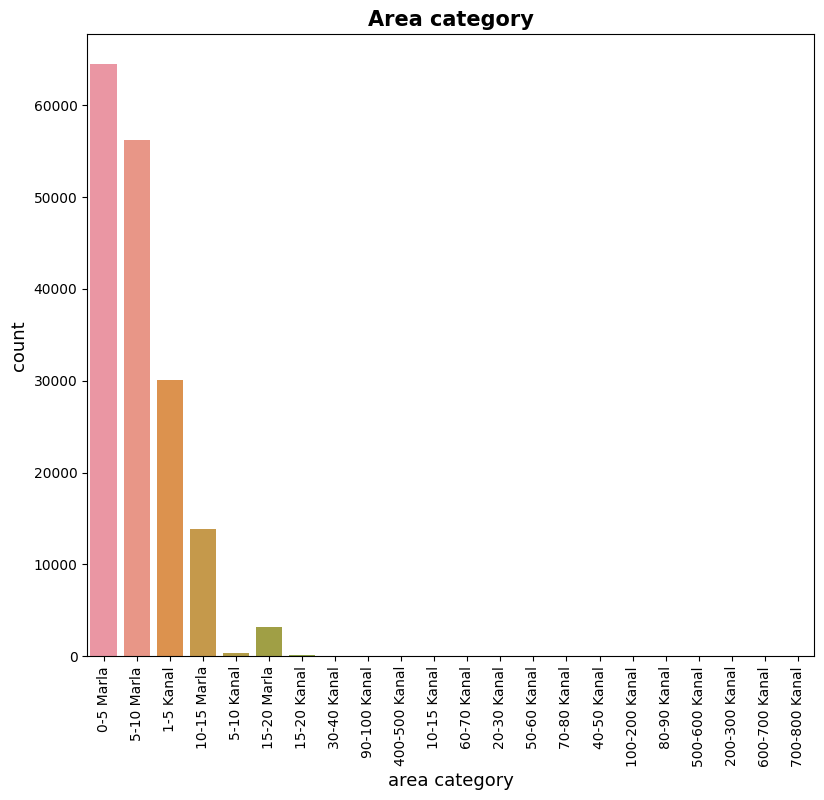

In [ ]:
categorical_columns = low_card_columns 
for col in categorical_columns:
    set_labels(title=col.capitalize())
    print(f"Percentage of each categories in {col.capitalize()}:\n{df[col].value_counts()/df.shape[0]}")
    if col == 'area category':
        sns.countplot(data=df,x=col)
        plt.xticks(rotation=90)
    else:
        sns.countplot(data=df,x=col)
    plt.show()
    

## Numerical Columns

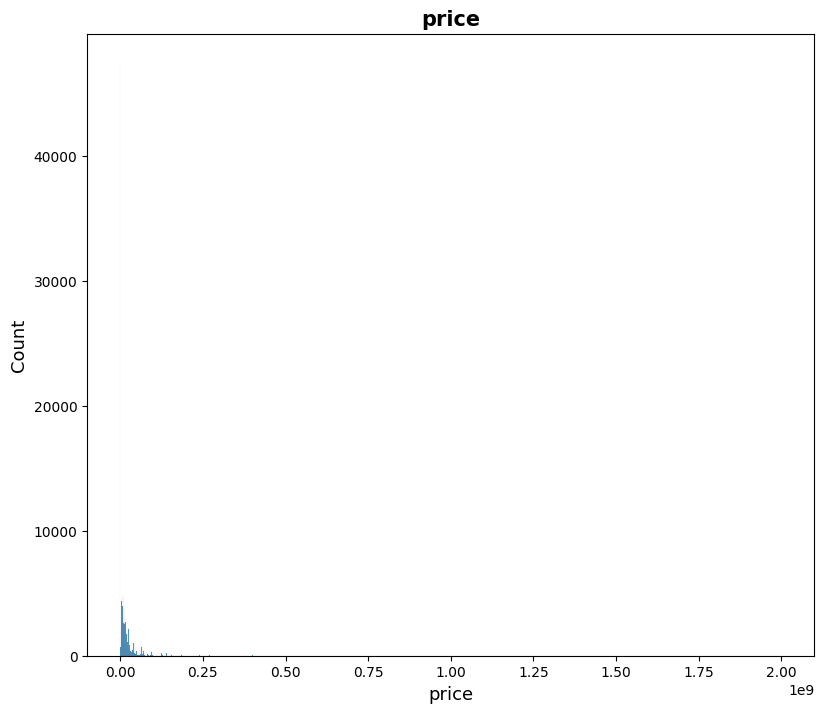

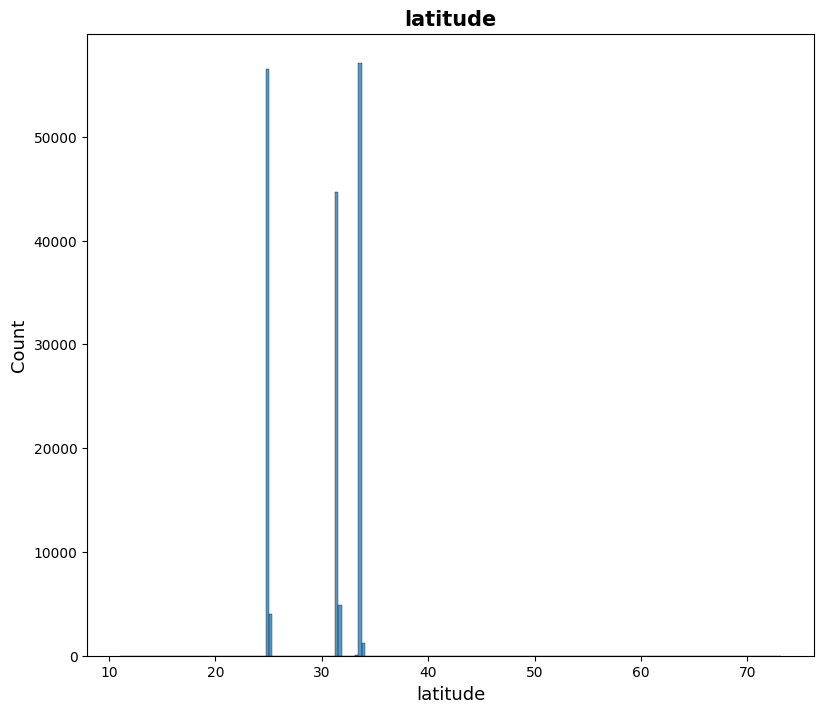

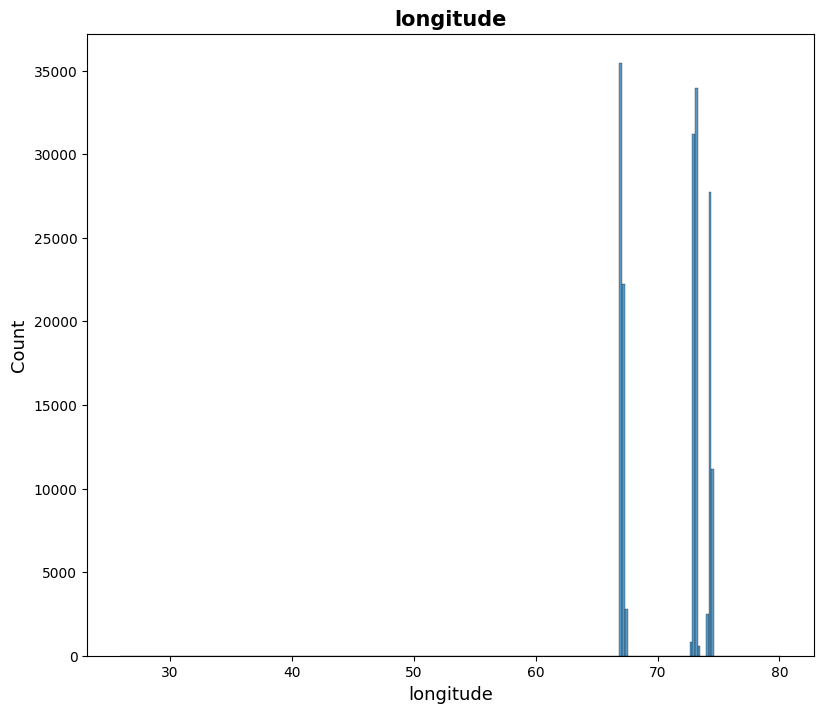

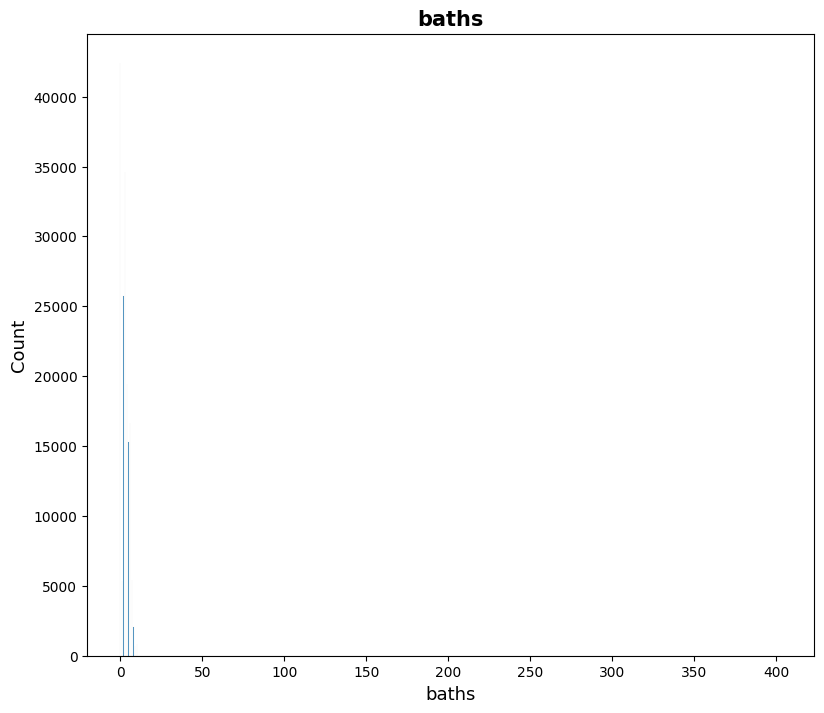

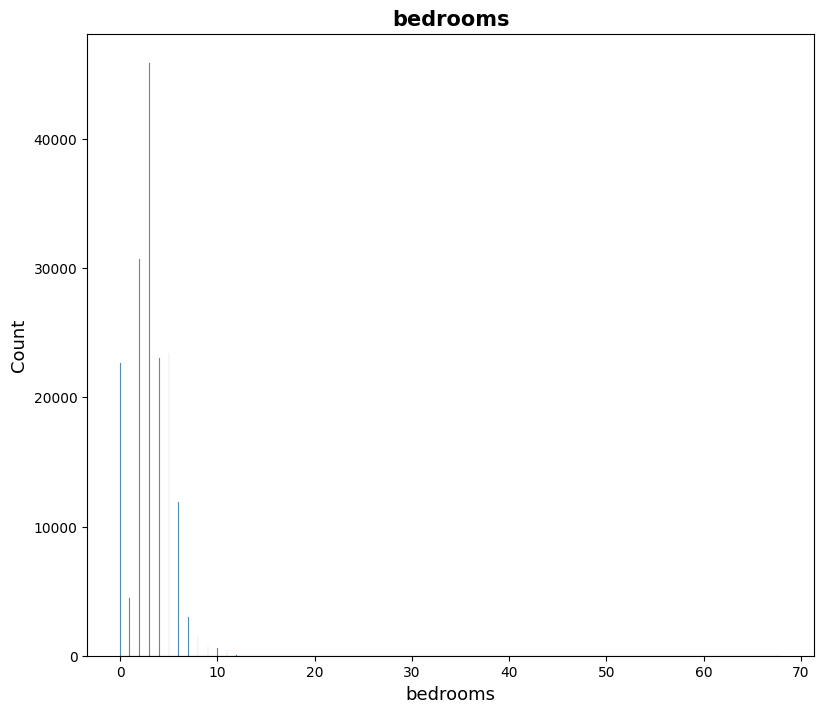

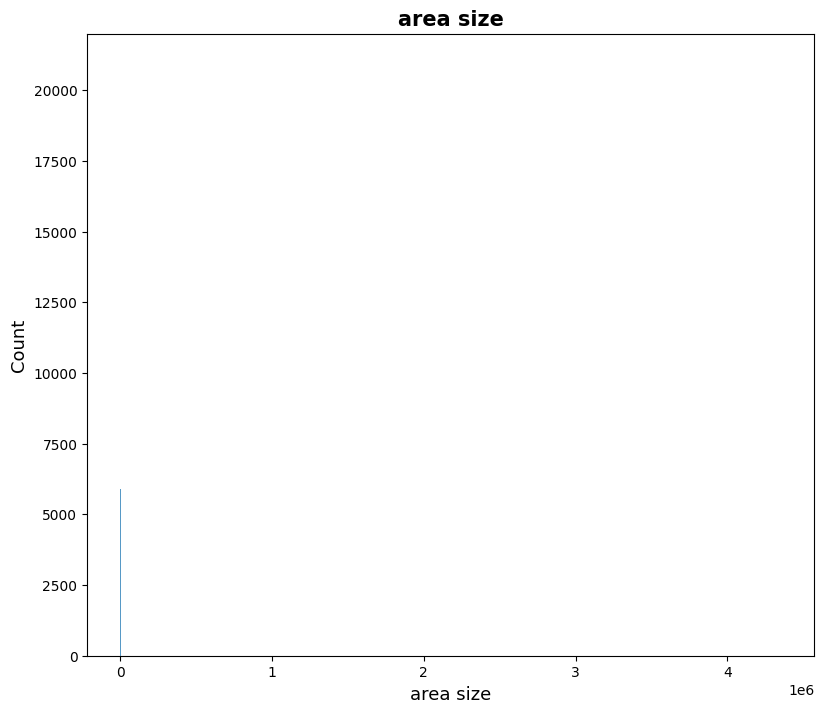

In [ ]:
for col in numerical_columns:
    set_labels(title=col)
    sns.histplot(data=df, x=col)
    plt.show()

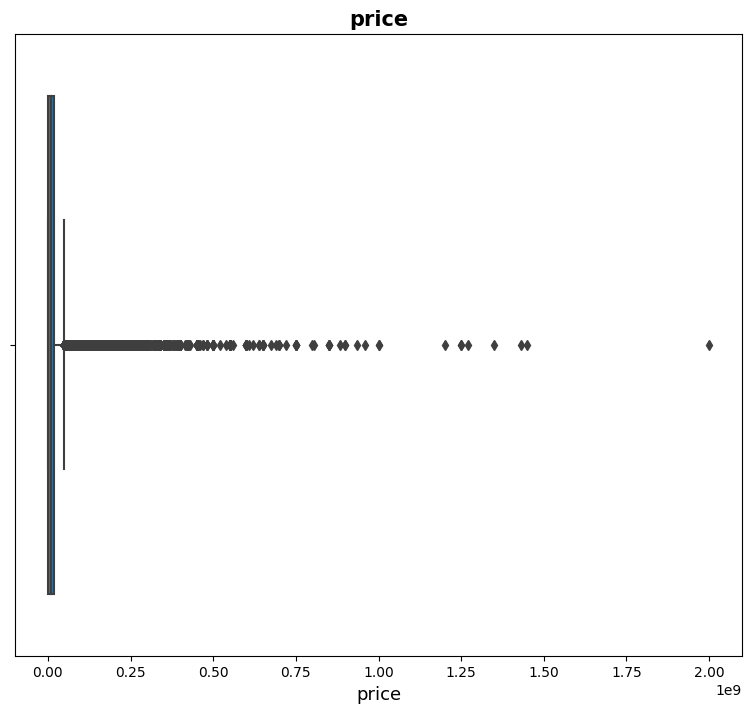

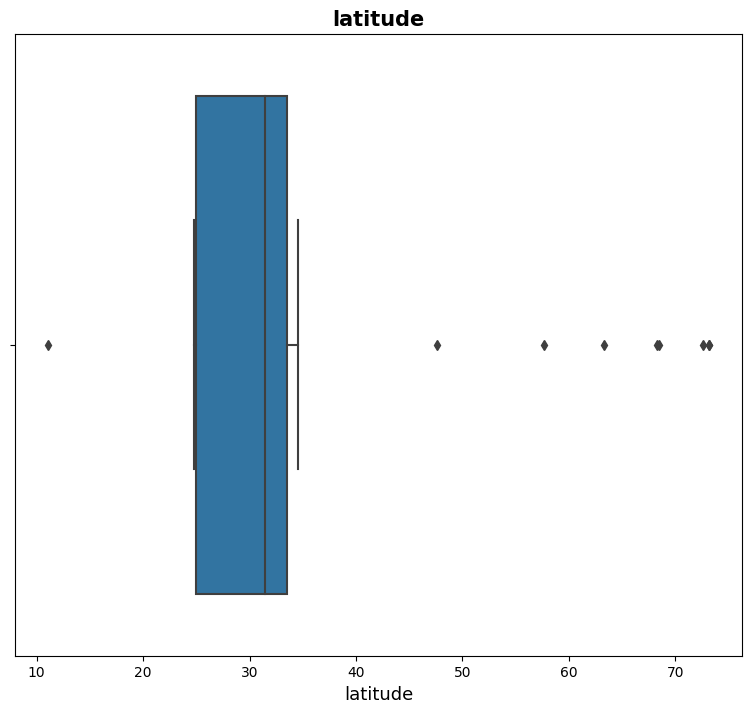

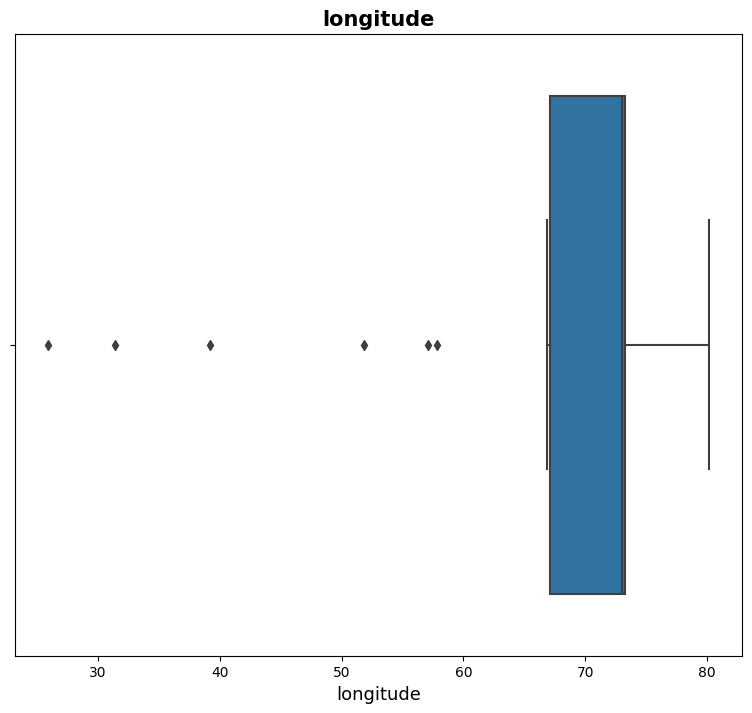

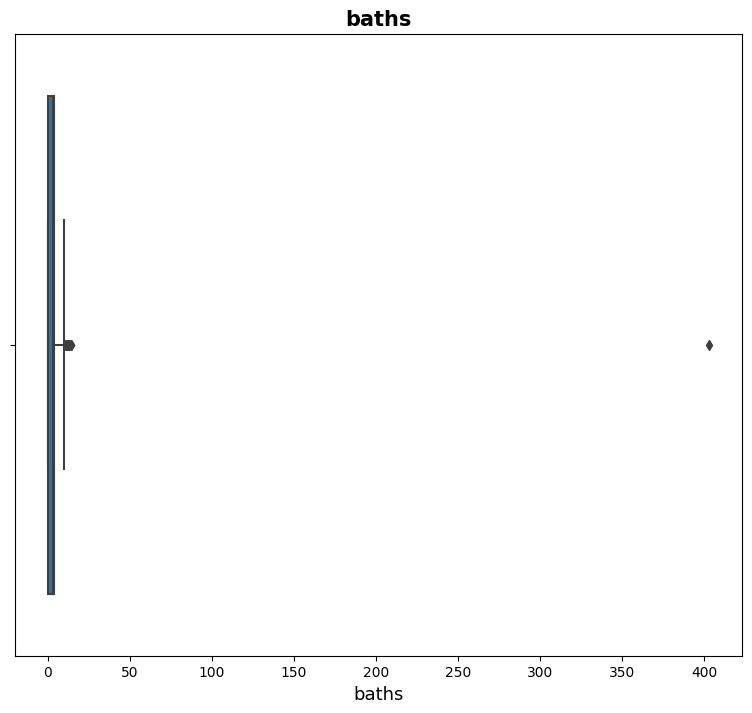

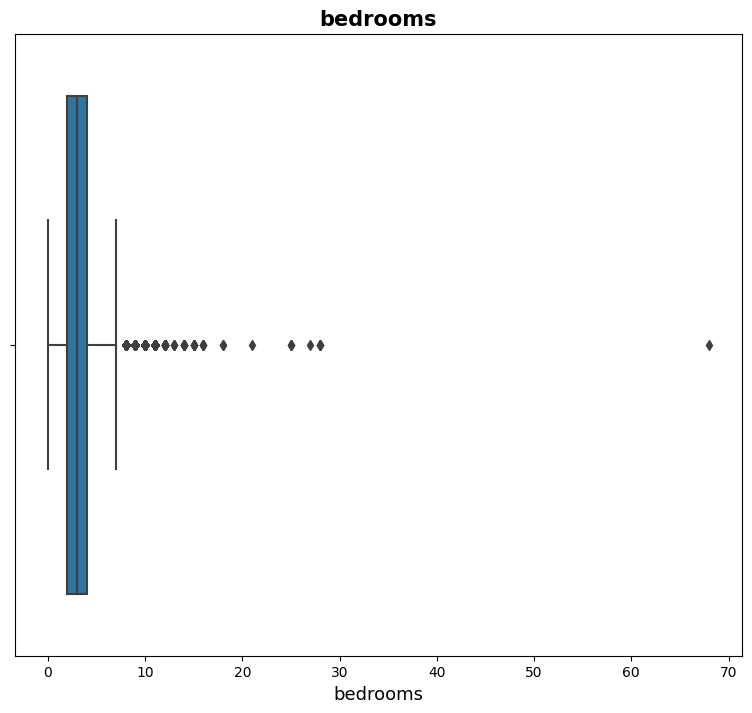

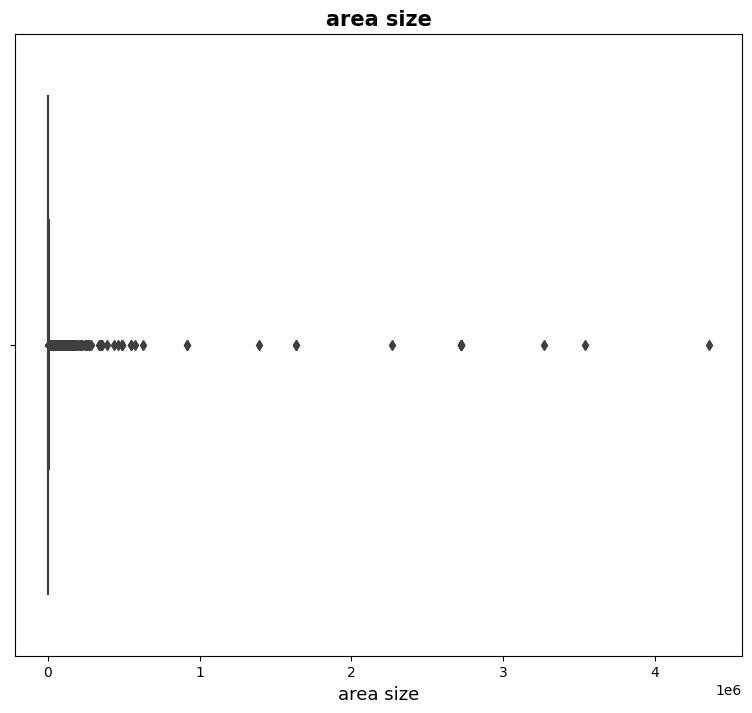

In [ ]:
for col in numerical_columns:
    set_labels(title=col)
    sns.boxplot(data=df, x=col)
    plt.show()

<Axes: xlabel='baths', ylabel='Count'>

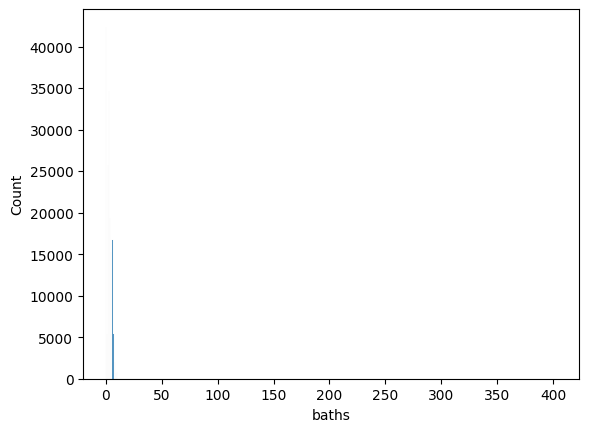

In [ ]:
sns.histplot(data=df,x='baths')

In [ ]:
df['baths'].max()

403

In [ ]:
df['bedrooms'].max()

68